# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel('geo_comment.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [3]:
# Нормализуем данные
sc = StandardScaler()
X = pd.concat([data.x, data.y], axis=1)
X_sc = sc.fit_transform(X)

In [4]:
X_sc

array([[ 0.17363392, -0.12923628],
       [ 0.17363392, -0.12923628],
       [ 0.10766492, -0.66296372],
       ...,
       [-1.21078898,  0.94742964],
       [-1.01223806,  0.10649107],
       [-0.99241408,  0.76417507]])

In [5]:
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

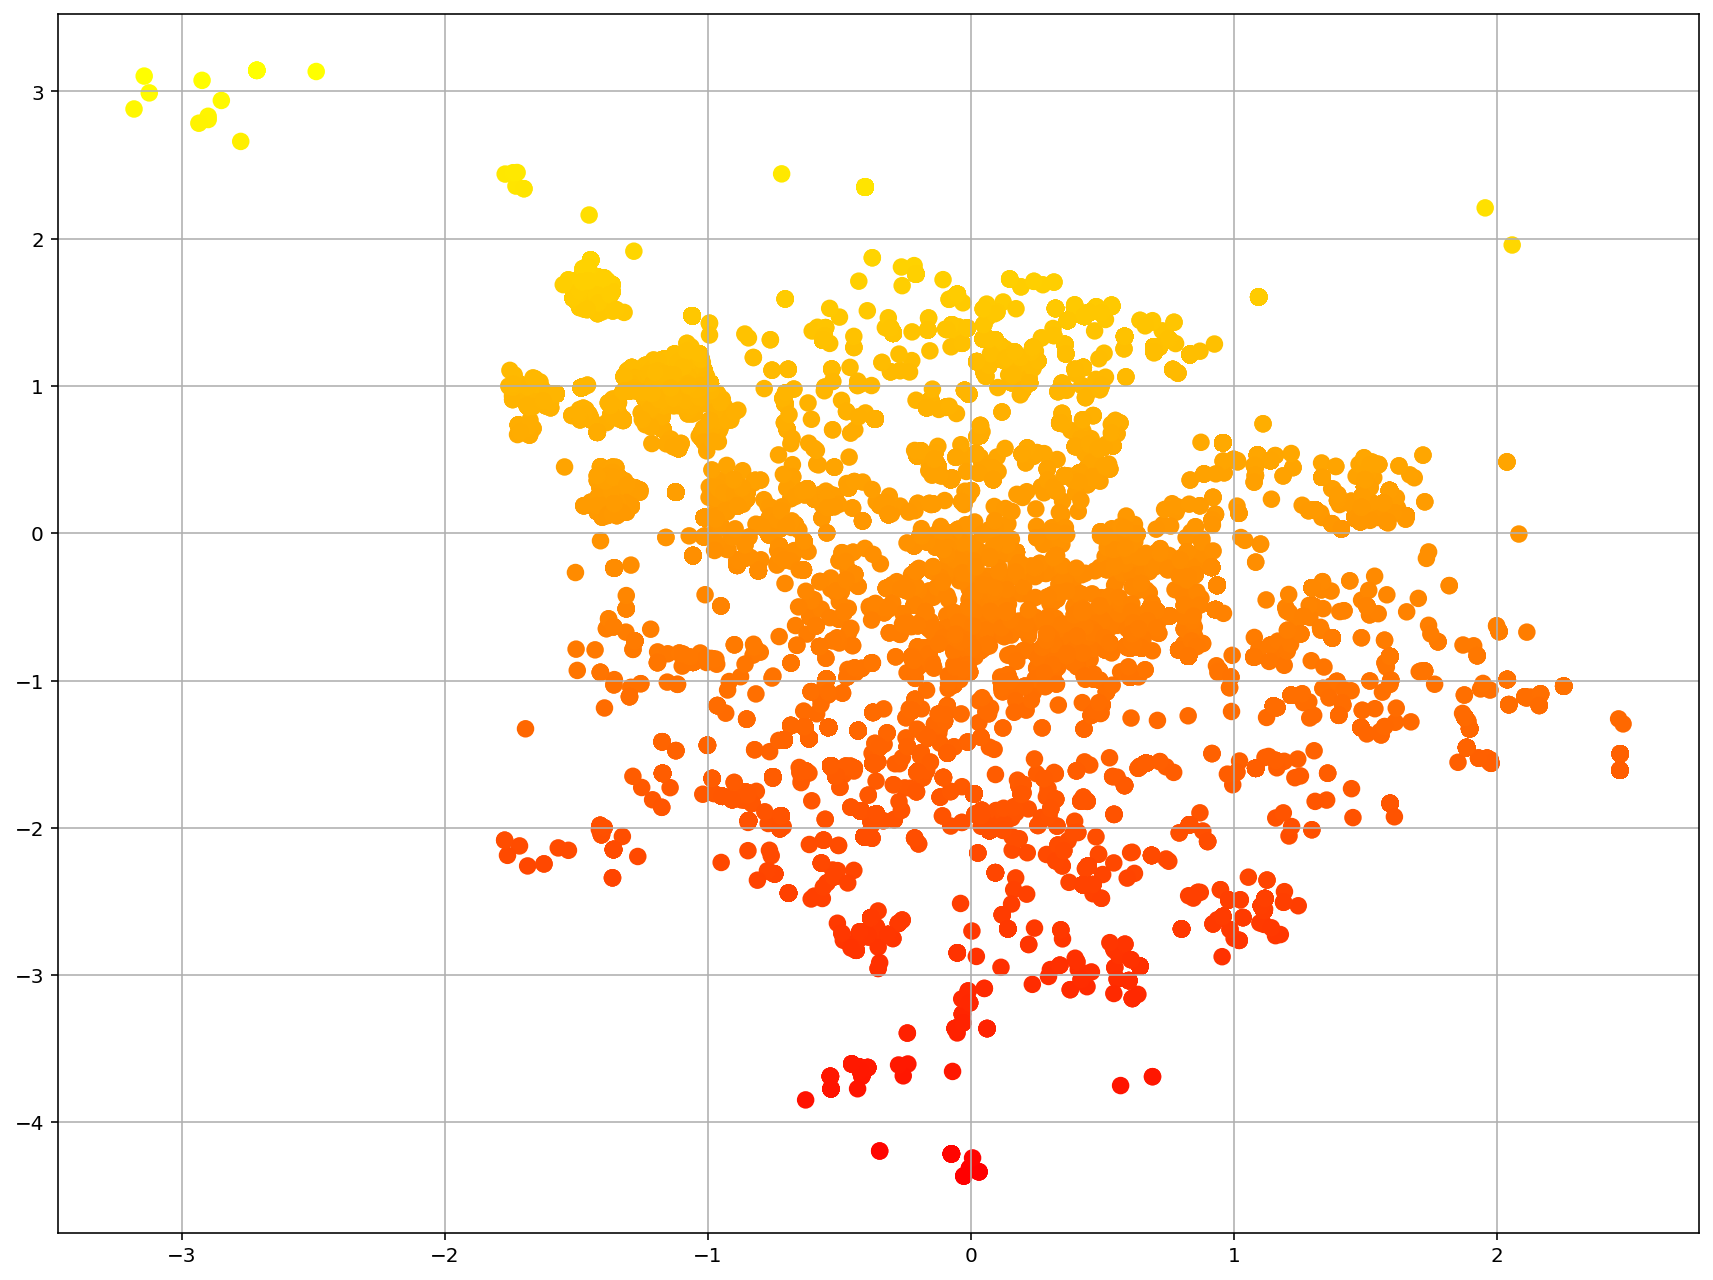

In [6]:
plt.scatter(X_sc[:,0], X_sc[:,1], c=X_sc[:,1], cmap='autumn', s=60)
plt.grid()
plt.tight_layout()

## 1. Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [8]:
# Функция генерации метрик и названий методов
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [9]:
X_train, X_test = train_test_split(X_sc, test_size=0.3, random_state=1)

In [10]:
clusters_random = np.random.randint(low=0, high=2, size=len(X_test))

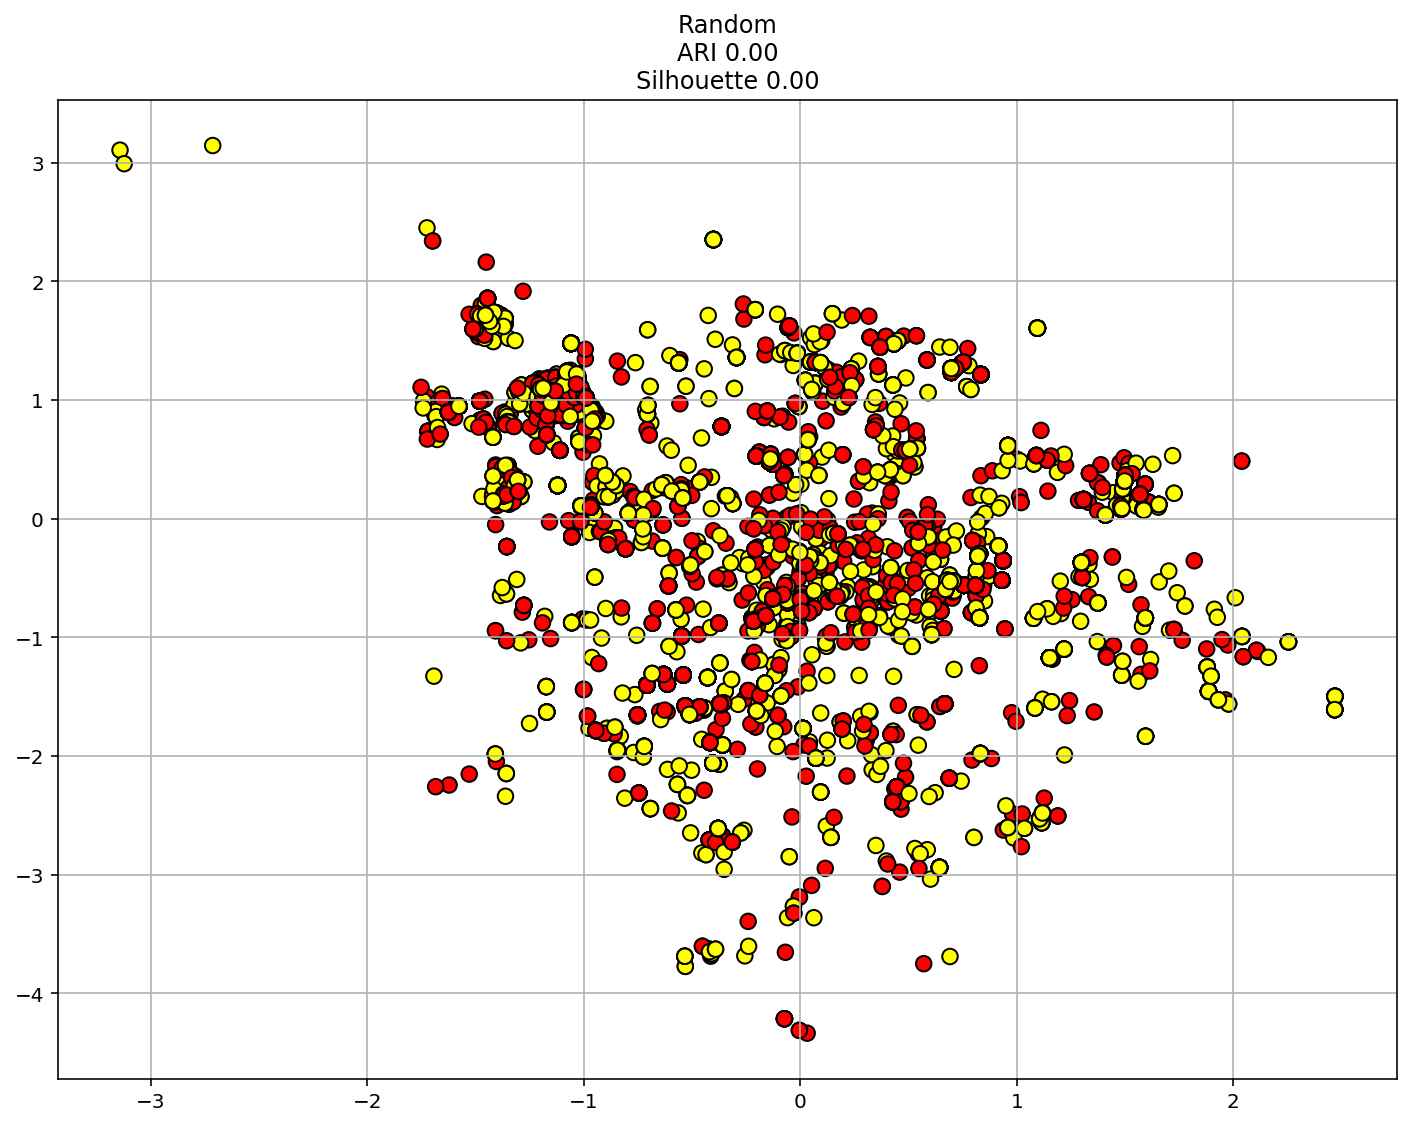

In [11]:
fig, axes = plt.subplots(figsize=(12, 9))
clusters_random = np.random.randint(low=0, high=2, size=len(X_test))
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters_random, cmap='autumn', s=60, edgecolor='black')
axes.set_title(get_descr("Random", X_test[:, 1], clusters_random, X_test))
axes.grid()

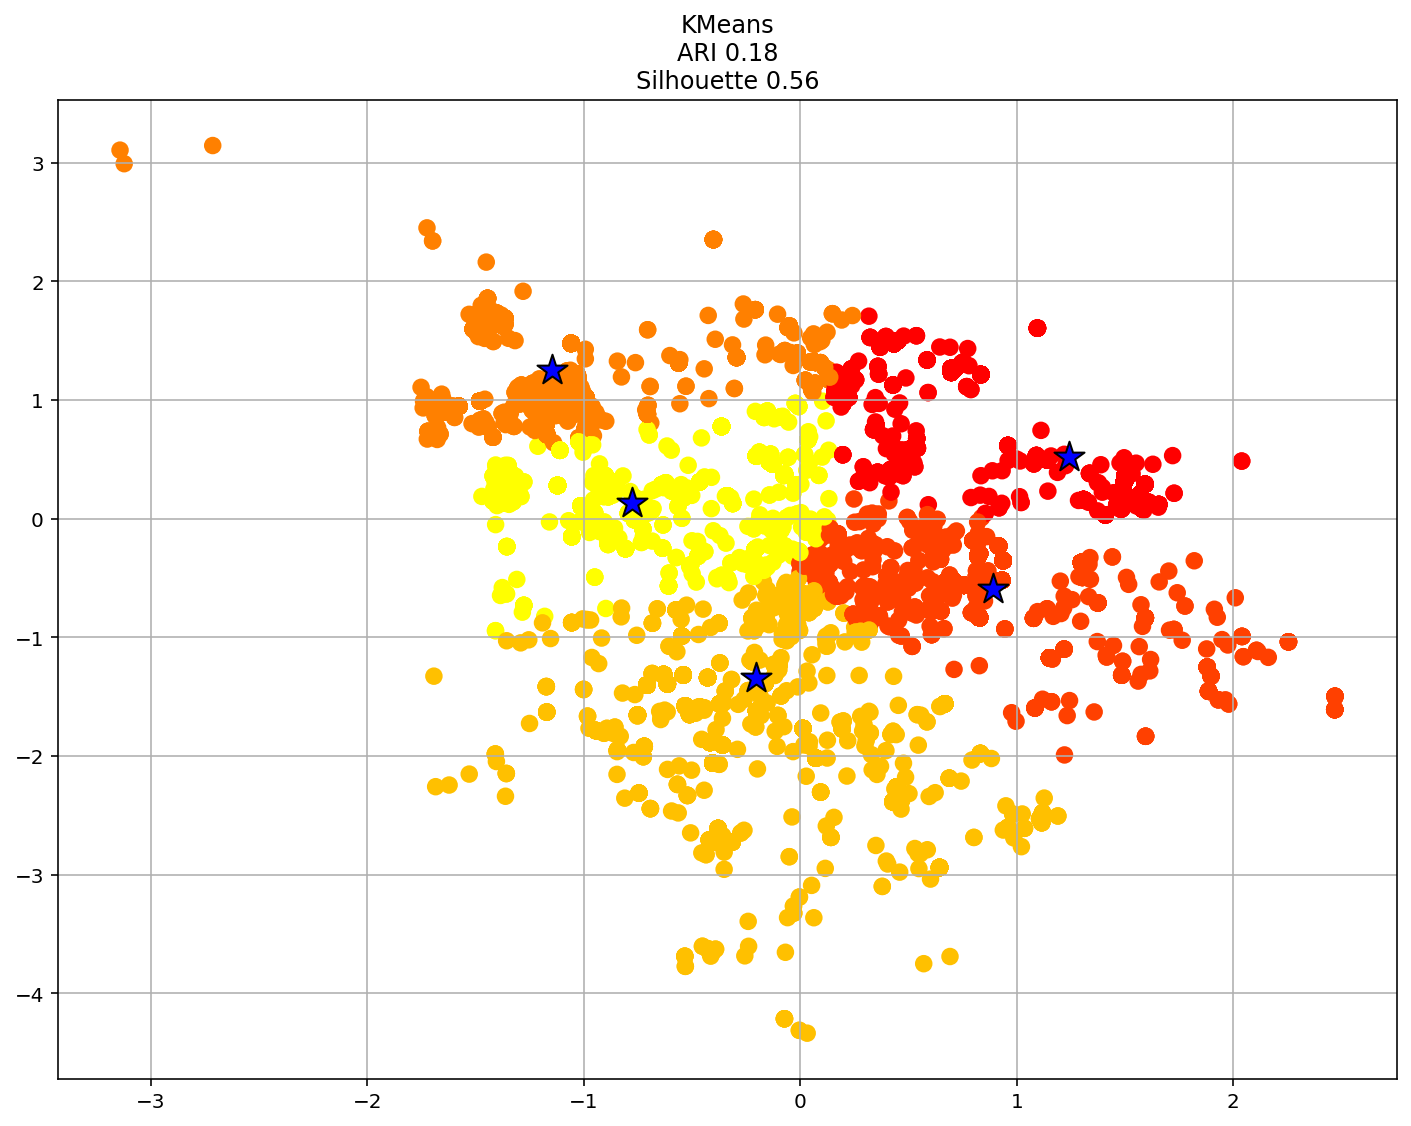

In [12]:
fig, axes = plt.subplots(figsize=(12, 9))
km = KMeans(n_clusters=5, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
clusters = km.fit_predict(X_test)
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters, cmap='autumn', s=60)
axes.set_title(get_descr('KMeans', X_test[:, 1], clusters, X_test))
axes.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')
axes.grid()

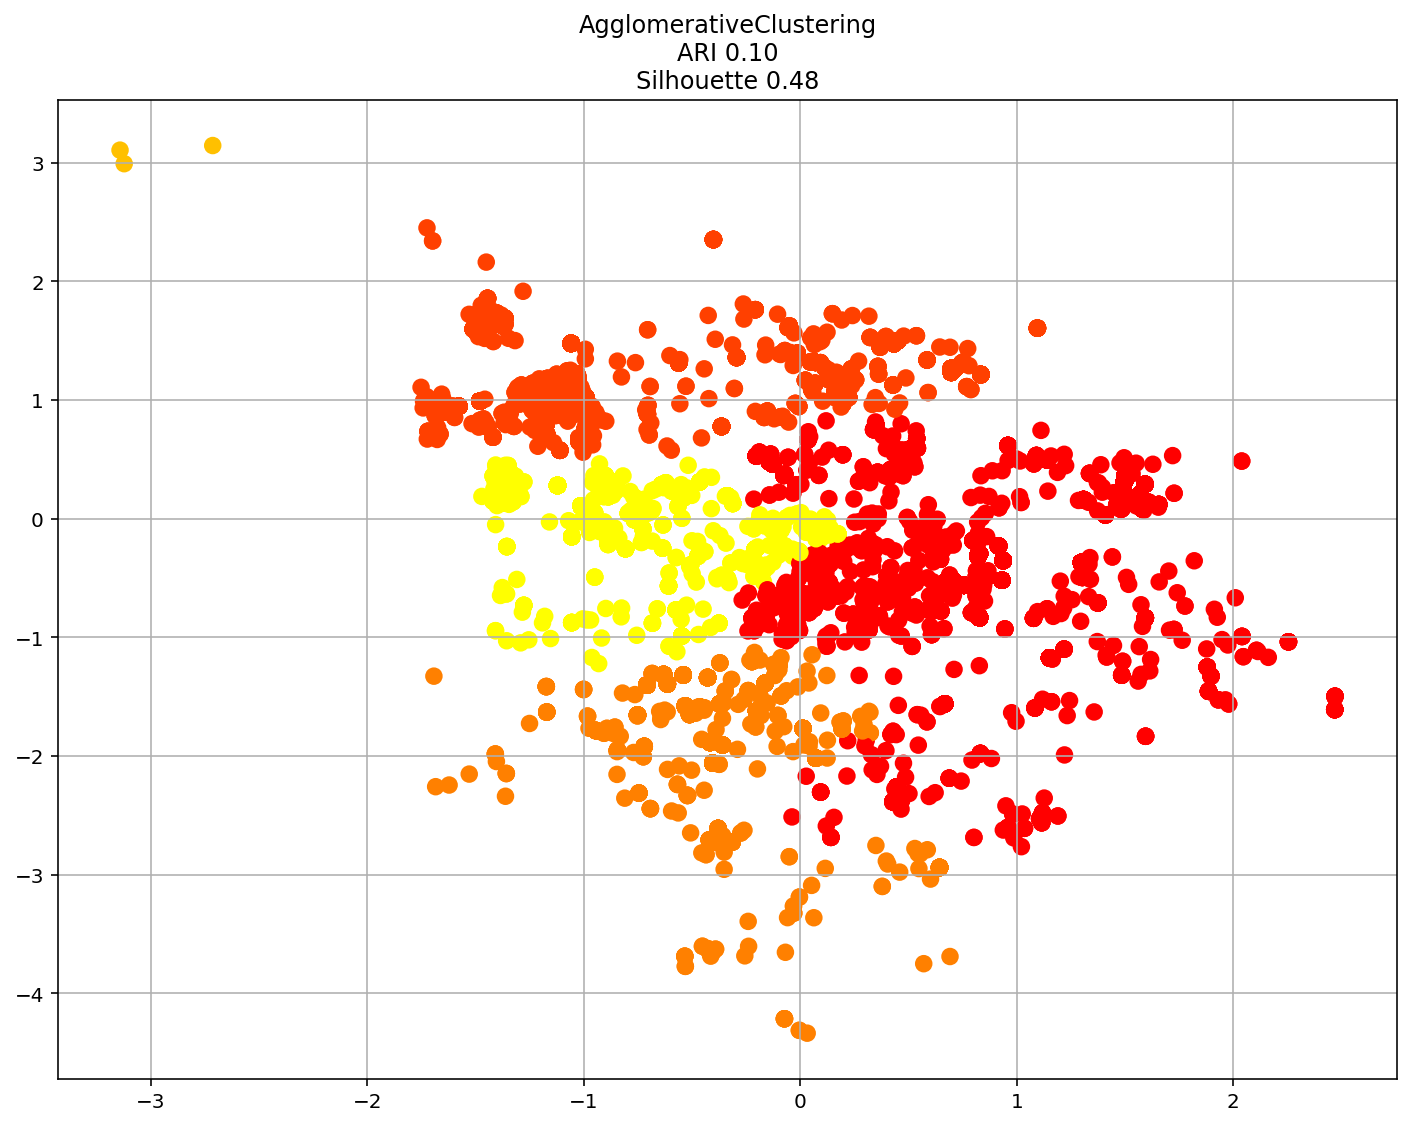

In [13]:
fig, axes = plt.subplots(figsize=(12, 9))
ag = AgglomerativeClustering(n_clusters=5, affinity='euclidean', 
                             linkage='complete')
clusters = ag.fit_predict(X_test)
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters, cmap='autumn', s=60)
axes.set_title(get_descr('AgglomerativeClustering', X_test[:, 1], clusters, X_test))
axes.grid()

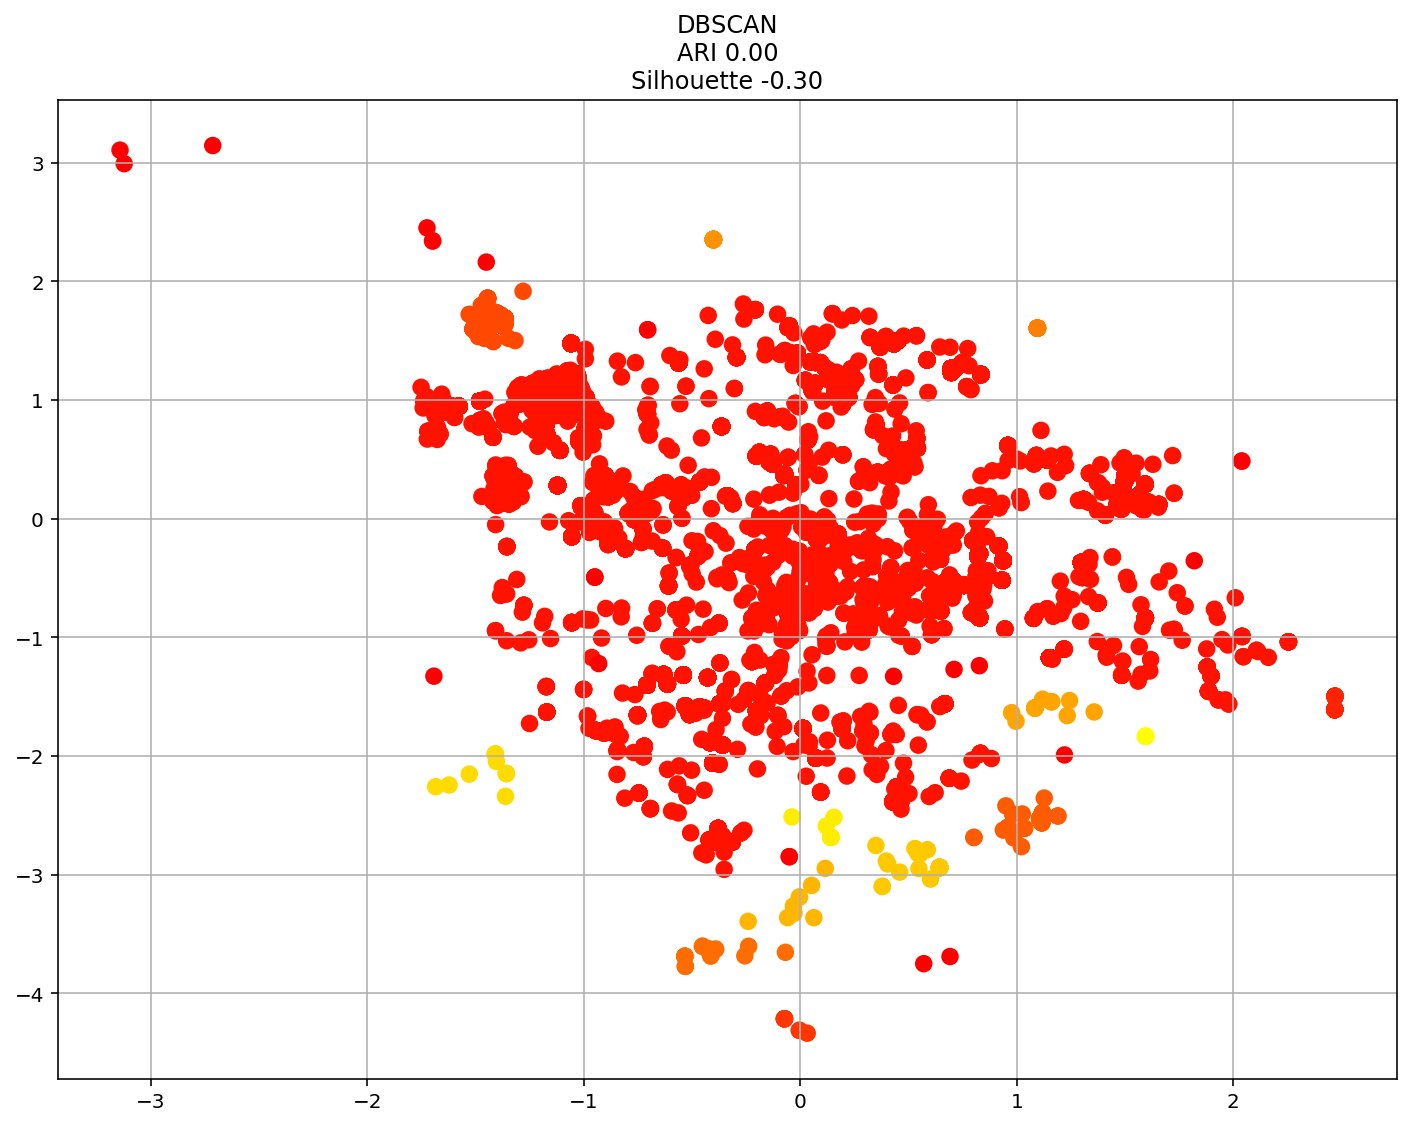

In [14]:
fig, axes = plt.subplots(figsize=(12, 9))
dbs = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
clusters = dbs.fit_predict(X_test)
axes.scatter(X_test[:, 0], X_test[:, 1], c=clusters, cmap='autumn', s=60)
axes.set_title(get_descr('DBSCAN', X_test[:, 1], clusters, X_test))
axes.grid()

## 2. Aналогично исследовать скопления голосов за и против отдельно

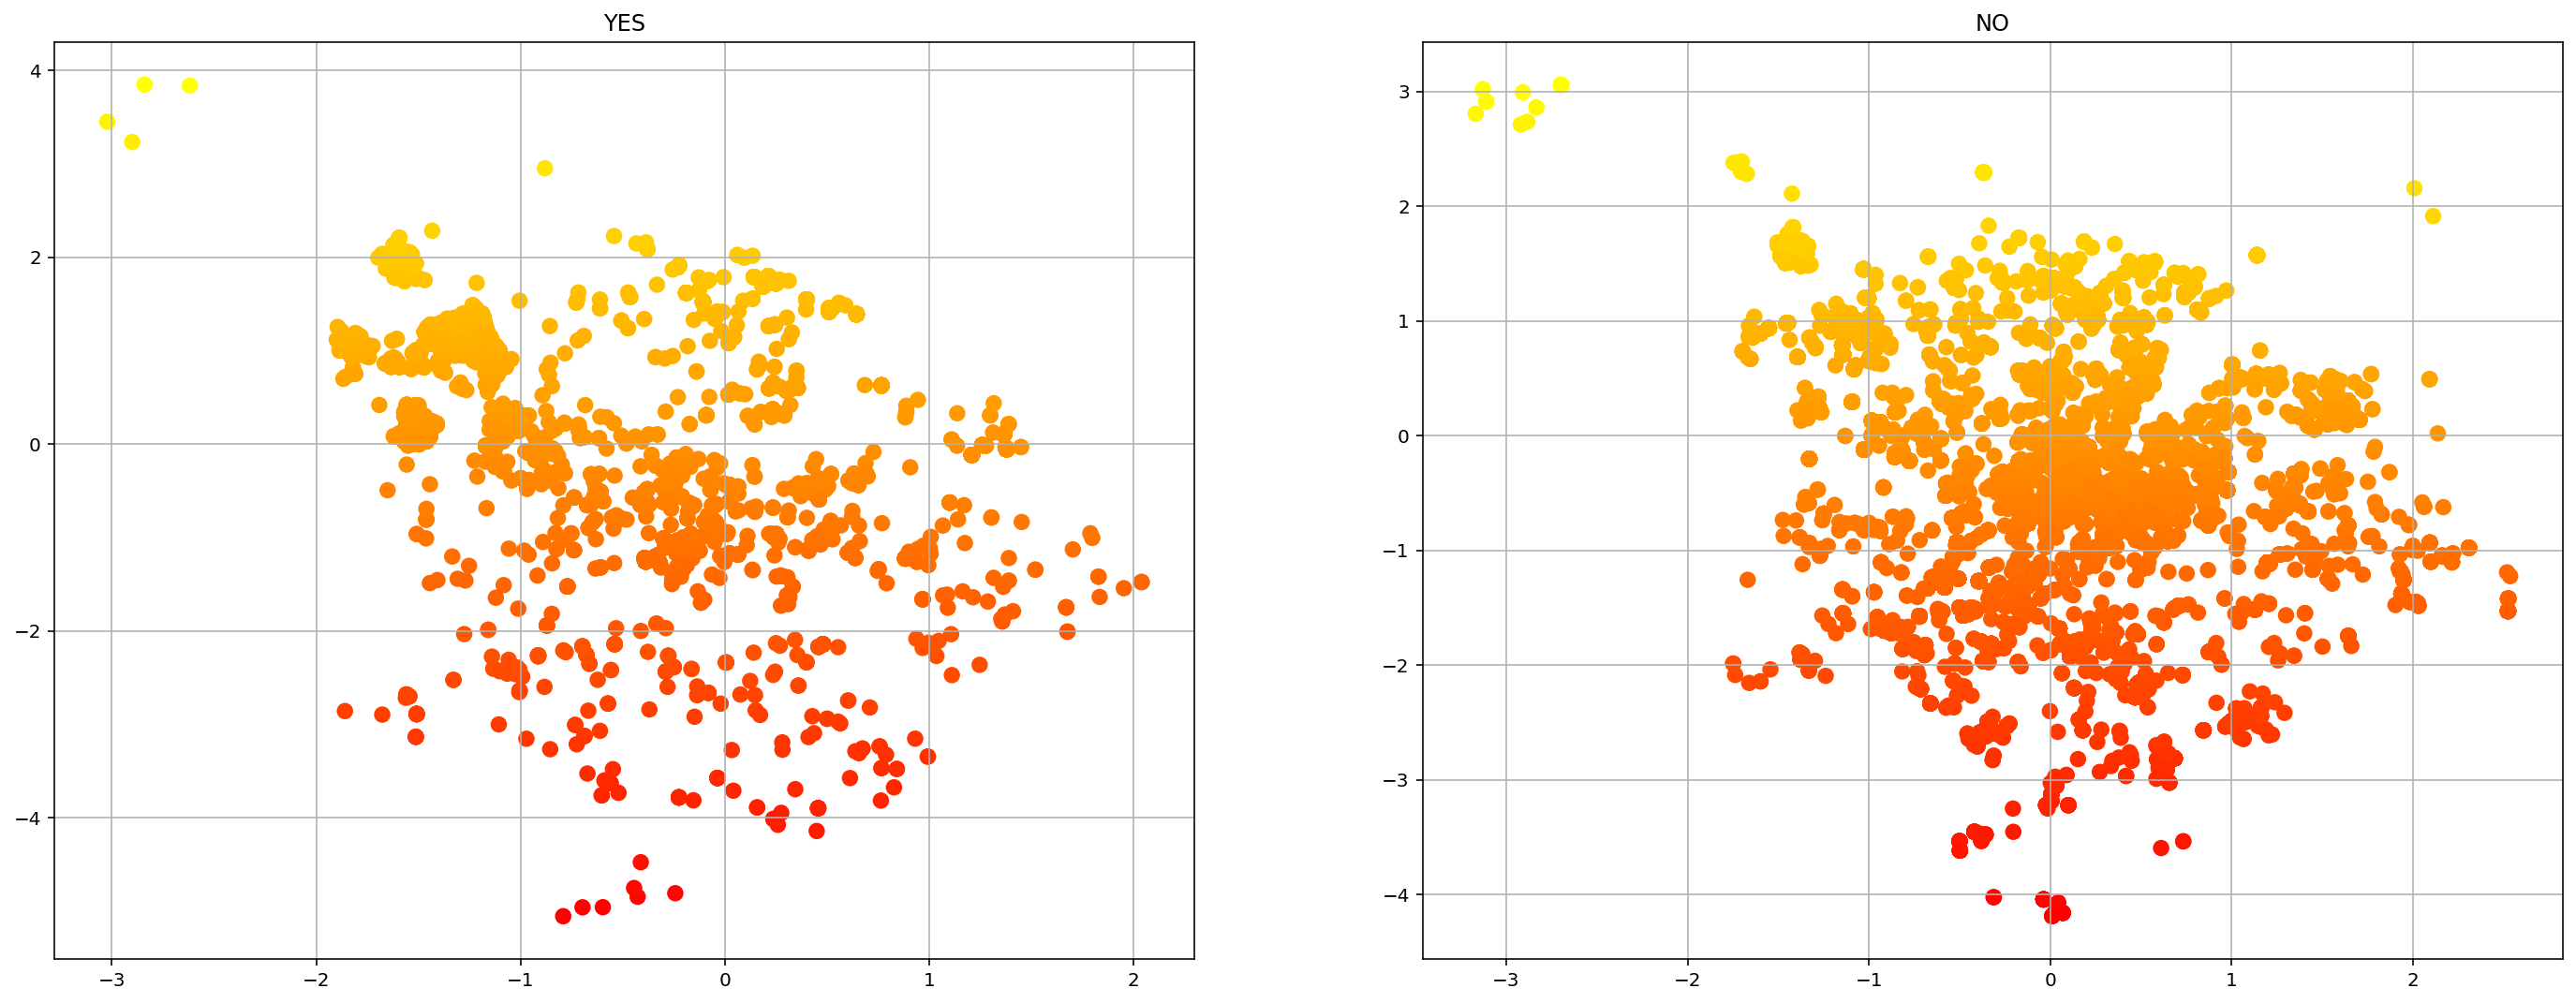

In [15]:
X1 = data.loc[data['comment_class'] == 1].drop(['Unnamed: 0', 'comment_class', 'multiplier', 'comment'], axis = 1)
X2 = data.loc[data['comment_class'] == -1].drop(['Unnamed: 0', 'comment_class', 'multiplier', 'comment'], axis = 1)
X1_sc = sc.fit_transform(X1)
X2_sc = sc.fit_transform(X2)
fig, axes = plt.subplots(1, 2, figsize=(24, 9))
axes[0].scatter(X1_sc[:,0], X1_sc[:,1], c=X1_sc[:,1], cmap='autumn', s=60)
axes[0].set_title('YES')
axes[1].scatter(X2_sc[:,0], X2_sc[:,1], c=X2_sc[:,1], cmap='autumn', s=60)
axes[1].set_title('NO')
axes[0].grid()
axes[1].grid()

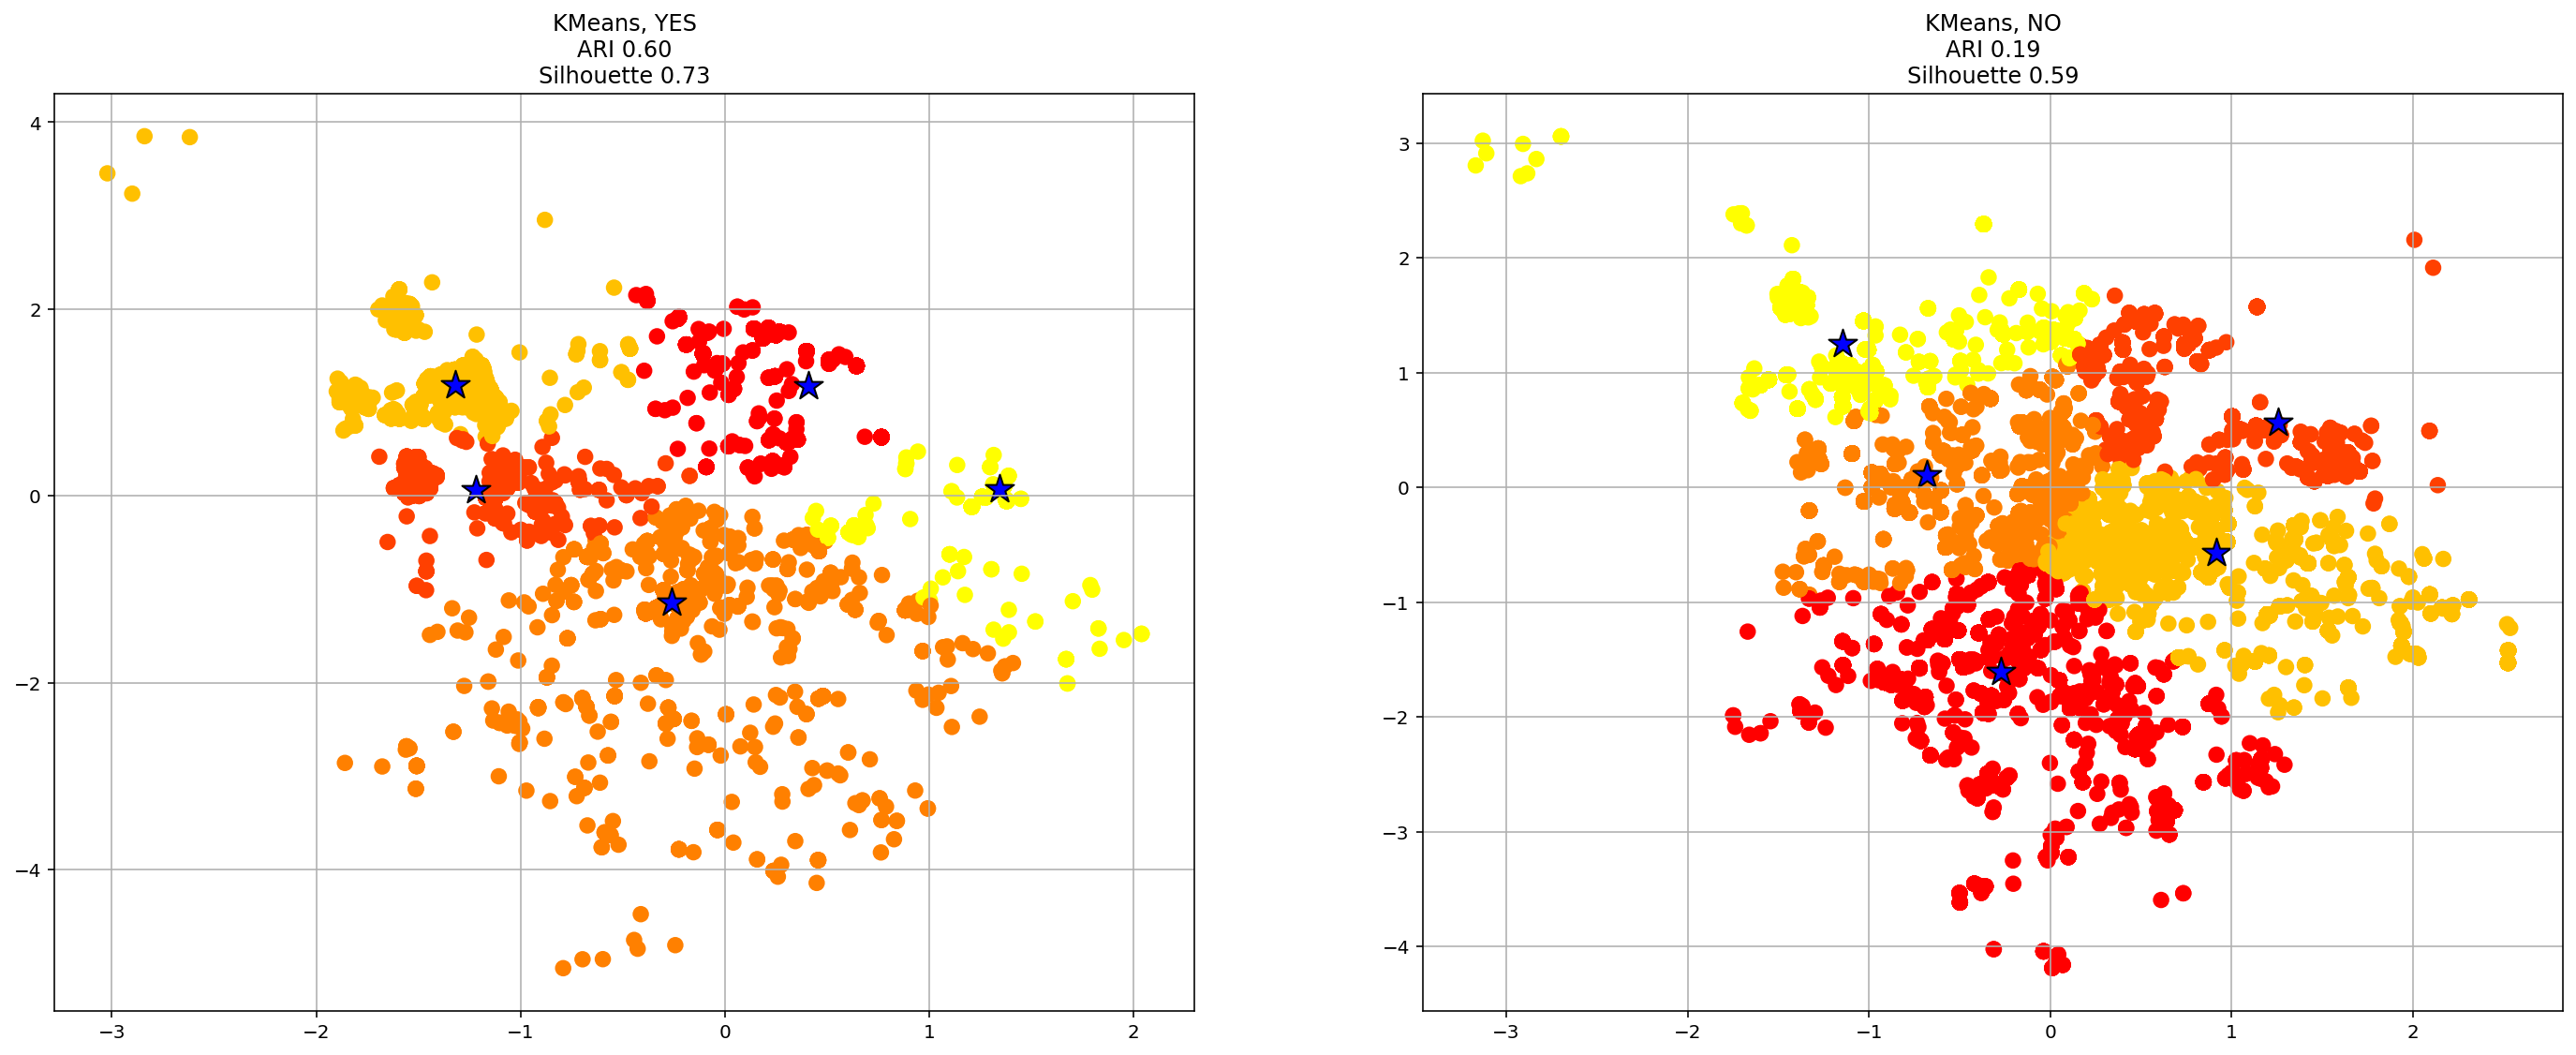

In [16]:
fig, axes = plt.subplots(1,2, figsize=(24, 9))
km = KMeans(n_clusters=5, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
clusters1 = km.fit_predict(X1_sc)
axes[0].scatter(X1_sc[:, 0], X1_sc[:, 1], c=clusters1, cmap='autumn', s=60)
axes[0].set_title(get_descr('KMeans, YES', X1_sc[:, 1], clusters1, X1_sc))
axes[0].scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')

clusters2 = km.fit_predict(X2_sc)
axes[1].scatter(X2_sc[:, 0], X2_sc[:, 1], c=clusters2, cmap='autumn', s=60)
axes[1].set_title(get_descr('KMeans, NO', X2_sc[:, 1], clusters2, X2_sc))
axes[1].scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')
axes[0].grid()
axes[1].grid()

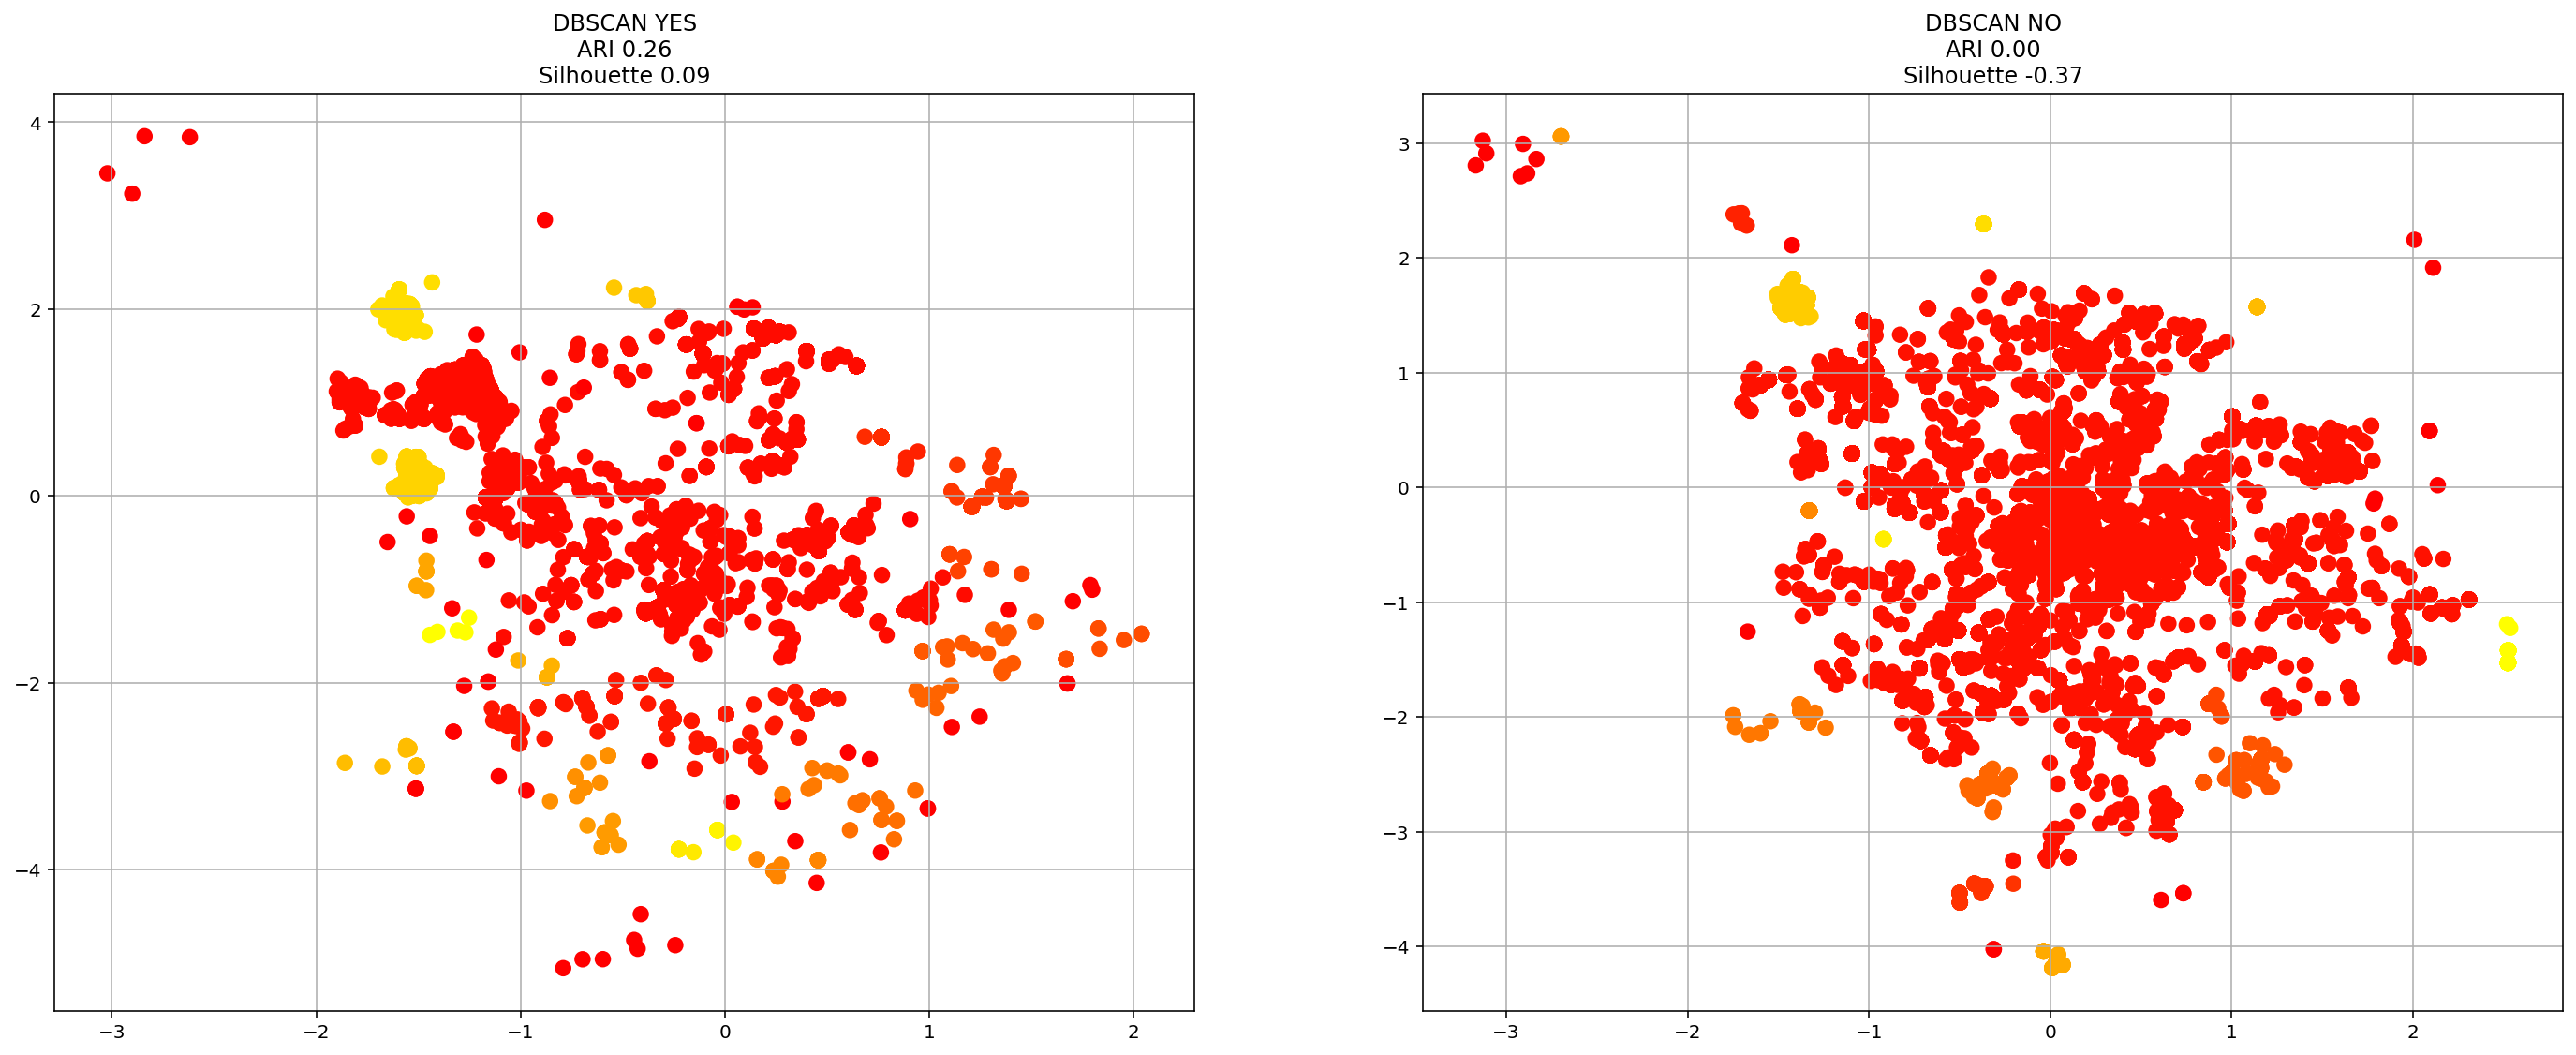

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(24, 9))
dbs = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
clusters1 = dbs.fit_predict(X1_sc)
axes[0].scatter(X1_sc[:, 0], X1_sc[:, 1], c=clusters1, cmap='autumn', s=60)
axes[0].set_title(get_descr('DBSCAN YES', X1_sc[:, 1], clusters1, X1_sc))

clusters2 = dbs.fit_predict(X2_sc)
axes[1].scatter(X2_sc[:, 0], X2_sc[:, 1], c=clusters2, cmap='autumn', s=60)
axes[1].set_title(get_descr('DBSCAN NO', X2_sc[:, 1], clusters2, X2_sc))
axes[0].grid()
axes[1].grid()

## 3. Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [18]:
# Подсчитаем оптимальное кол-во кластеров для K-Mean
k_inertia = []
ks = range(1,11)

for k in ks:
    km = KMeans(n_clusters=k, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
    
    clusters_kmeans = km.fit_predict(X_sc, )
    k_inertia.append(km.inertia_)

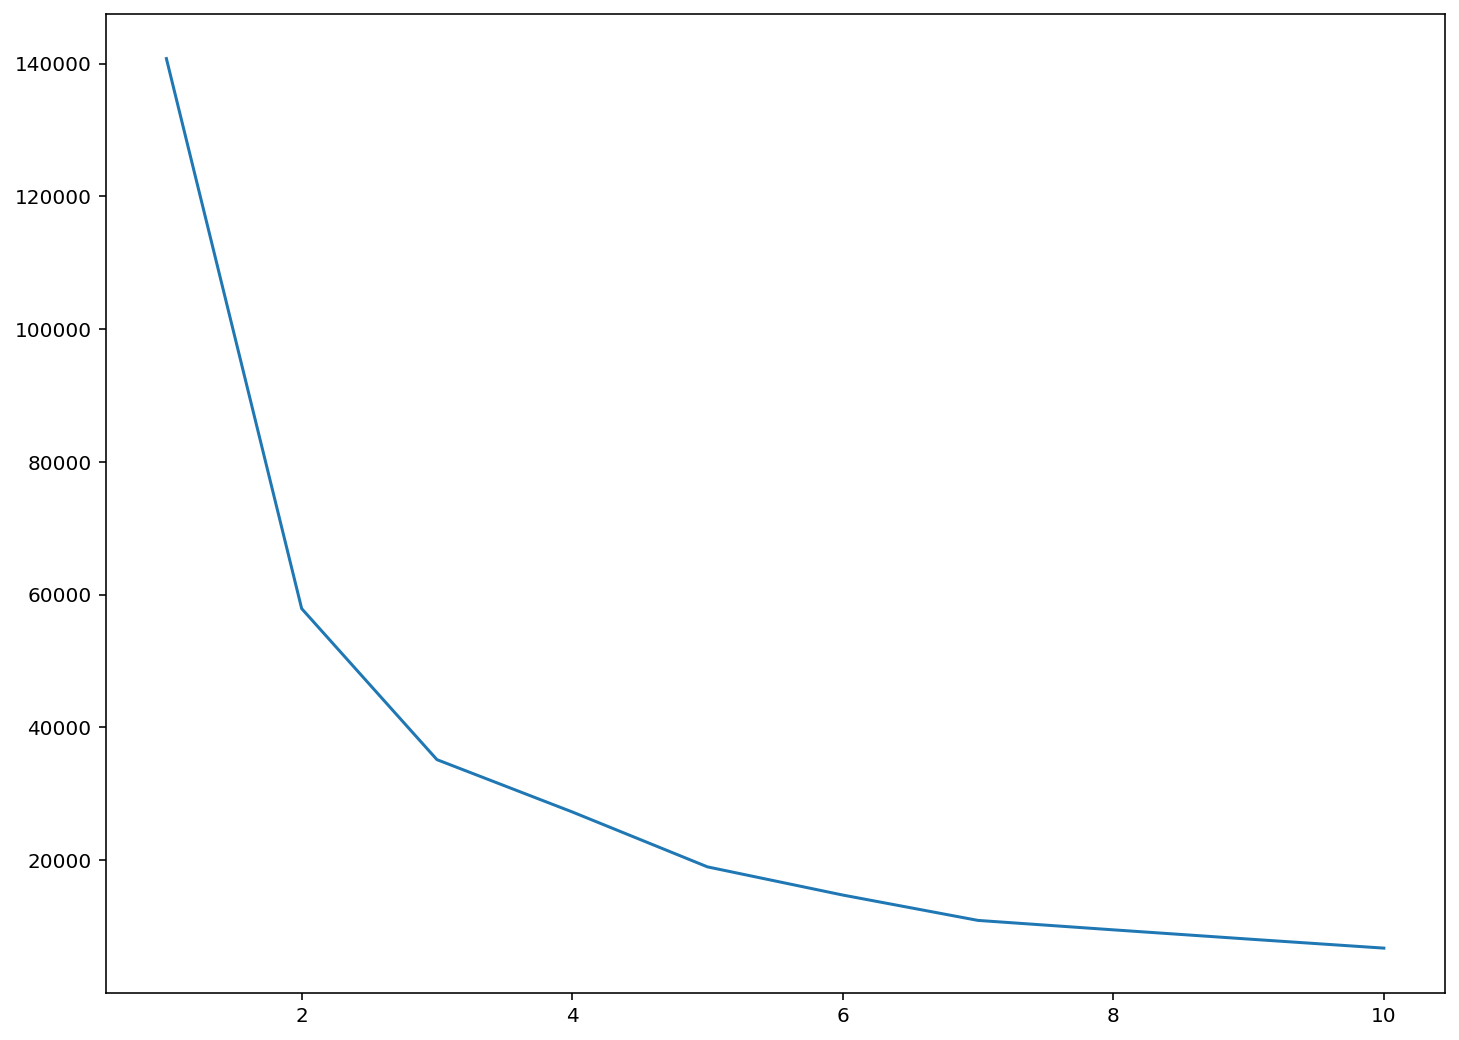

In [19]:
plt.plot(ks, k_inertia)

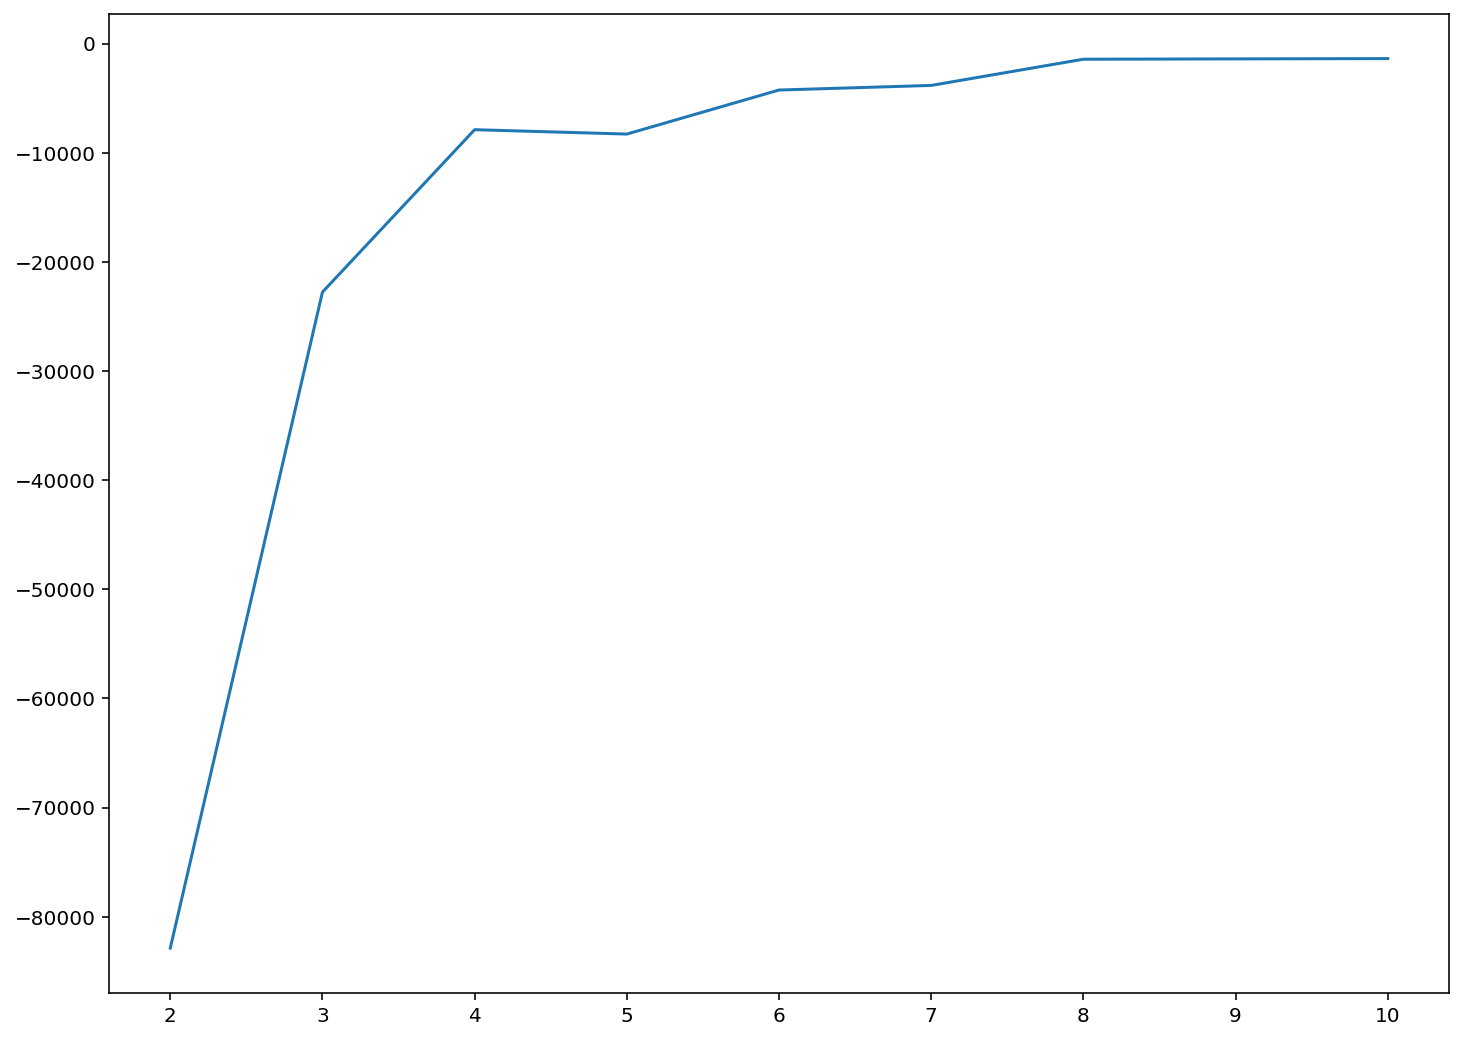

In [20]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

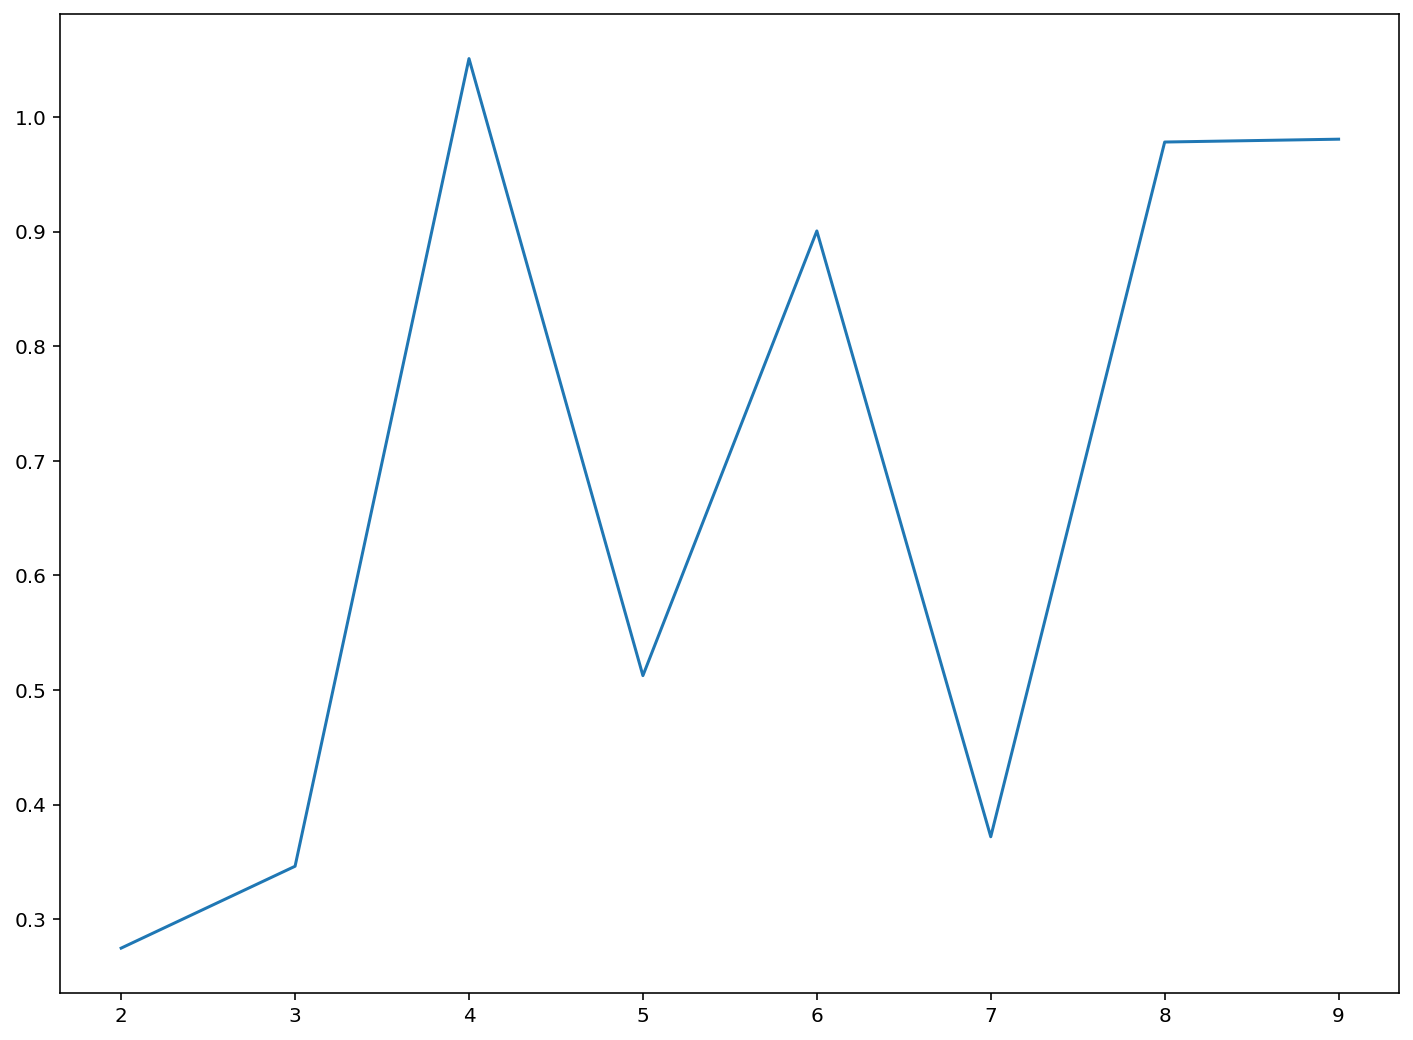

In [21]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [22]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

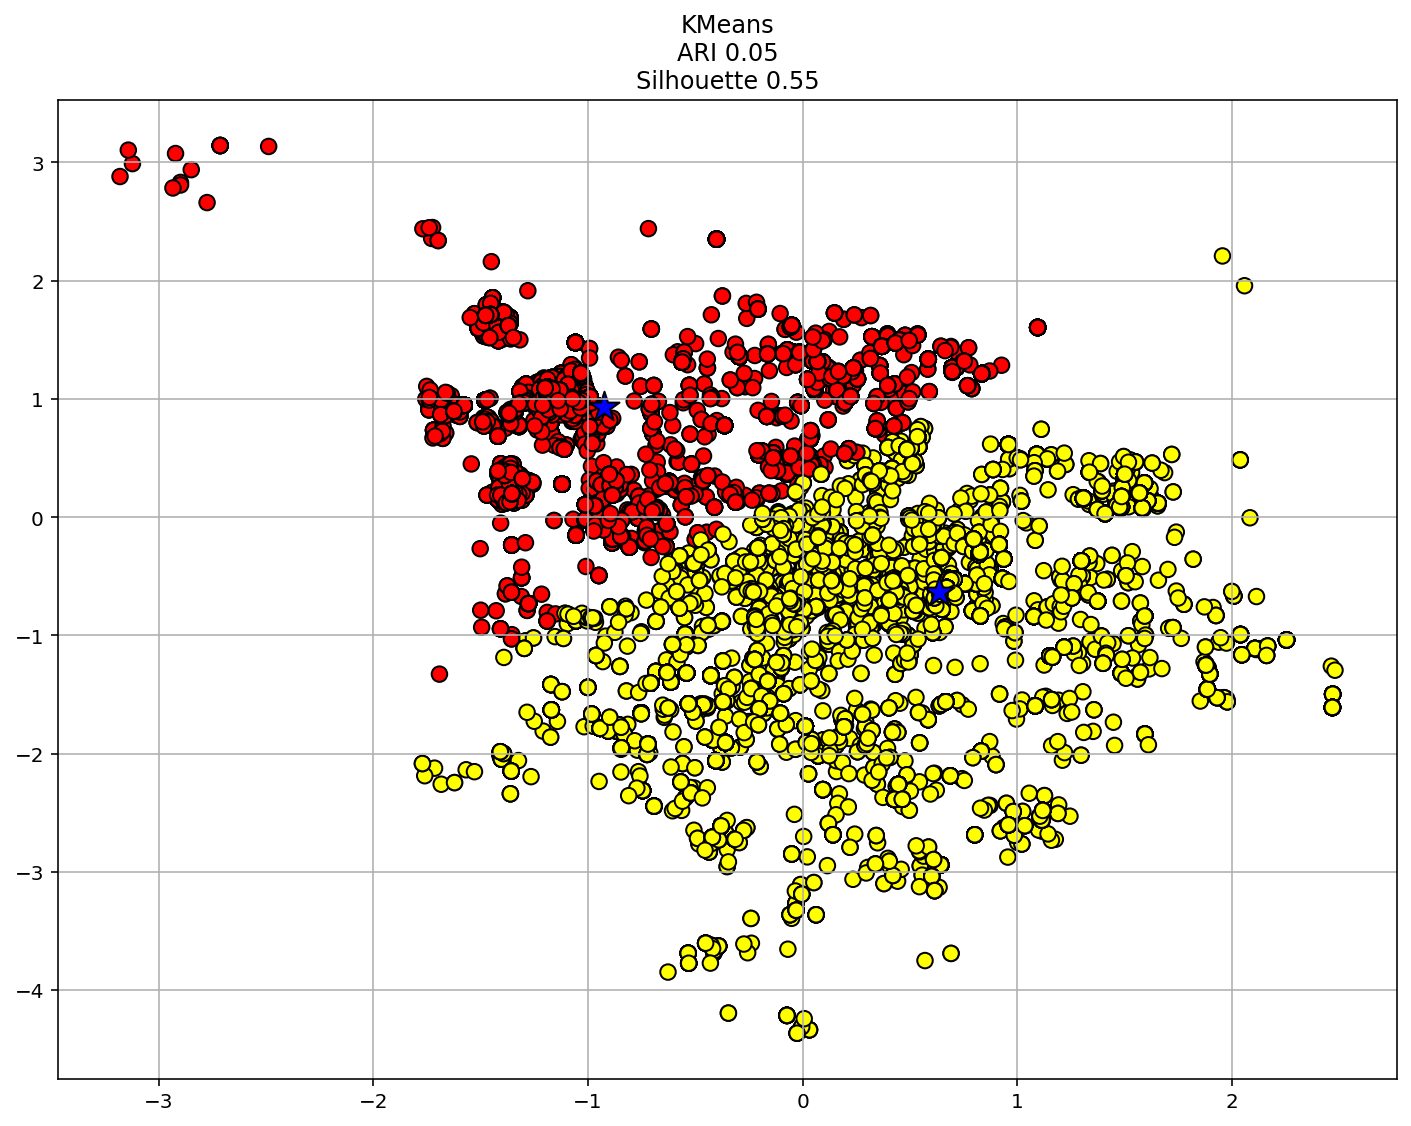

In [23]:
# Построим кластеризацию с учётом подобранного числа кластеров
fig, axes = plt.subplots(figsize=(12, 9))
km = KMeans(n_clusters=2, init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
clusters = km.fit_predict(X_sc)
axes.scatter(X_sc[:, 0], X_sc[:, 1], c=clusters, cmap='autumn', s=60, edgecolor='black')
axes.set_title(get_descr('KMeans', X_sc[:, 1], clusters, X_sc))
axes.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='Centroids')
axes.grid()

## 4. Найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

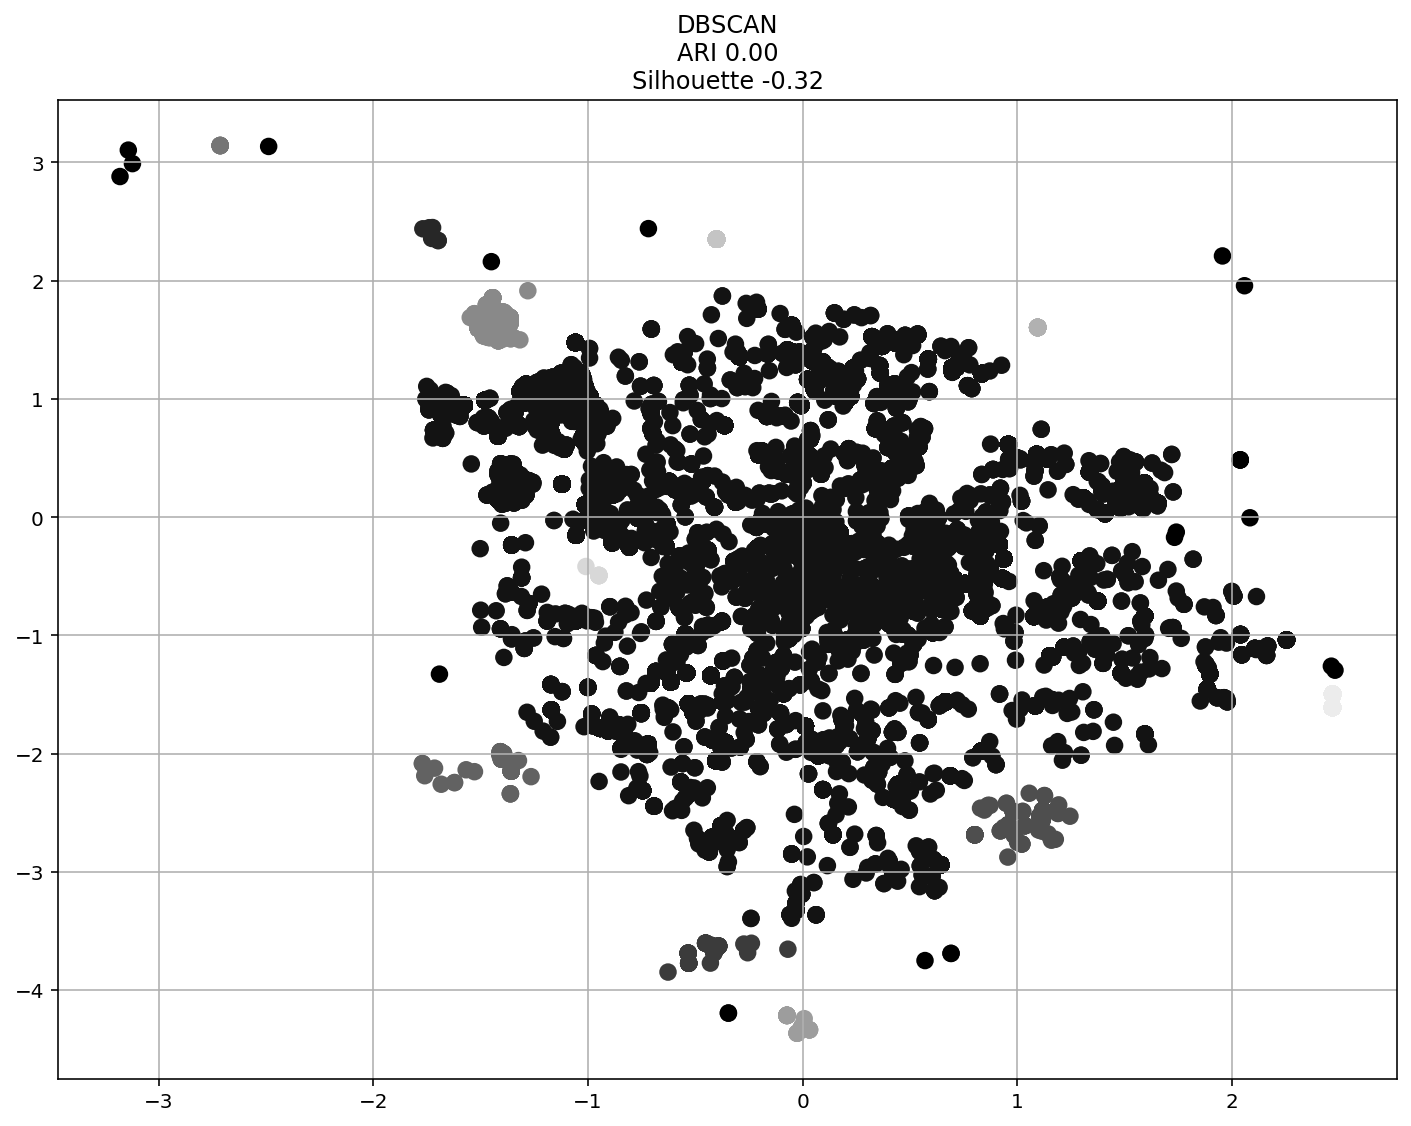

In [24]:
fig, axes = plt.subplots(figsize=(12, 9))
dbs = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
clusters = dbs.fit_predict(X_sc)
axes.scatter(X_sc[:, 0], X_sc[:, 1], c=clusters, cmap='gray', s=60)
axes.set_title(get_descr('DBSCAN', X_sc[:, 1], clusters, X_sc))
axes.grid()